In [1]:
# Load all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Turning off the warnings in ML
pd.options.mode.chained_assignment=None

In [3]:
# Loading and reading of dataset
AdClick_df = pd.read_csv('advertising_AdClick.csv')

In [4]:
# Shape of the dataset
print('Number of rows = ',AdClick_df.shape[0])
print('Number of columns = ',AdClick_df.shape[1])

Number of rows =  1000
Number of columns =  10


In [5]:
# Viewing of the entire dataset
AdClick_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [6]:
# Info
AdClick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
# Describe
AdClick_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
sns.set_palette('RdBu_r')
sns.set_style('whitegrid')

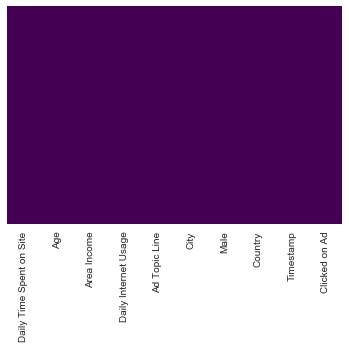

In [9]:
# Checking if there are missing values
sns.heatmap(AdClick_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

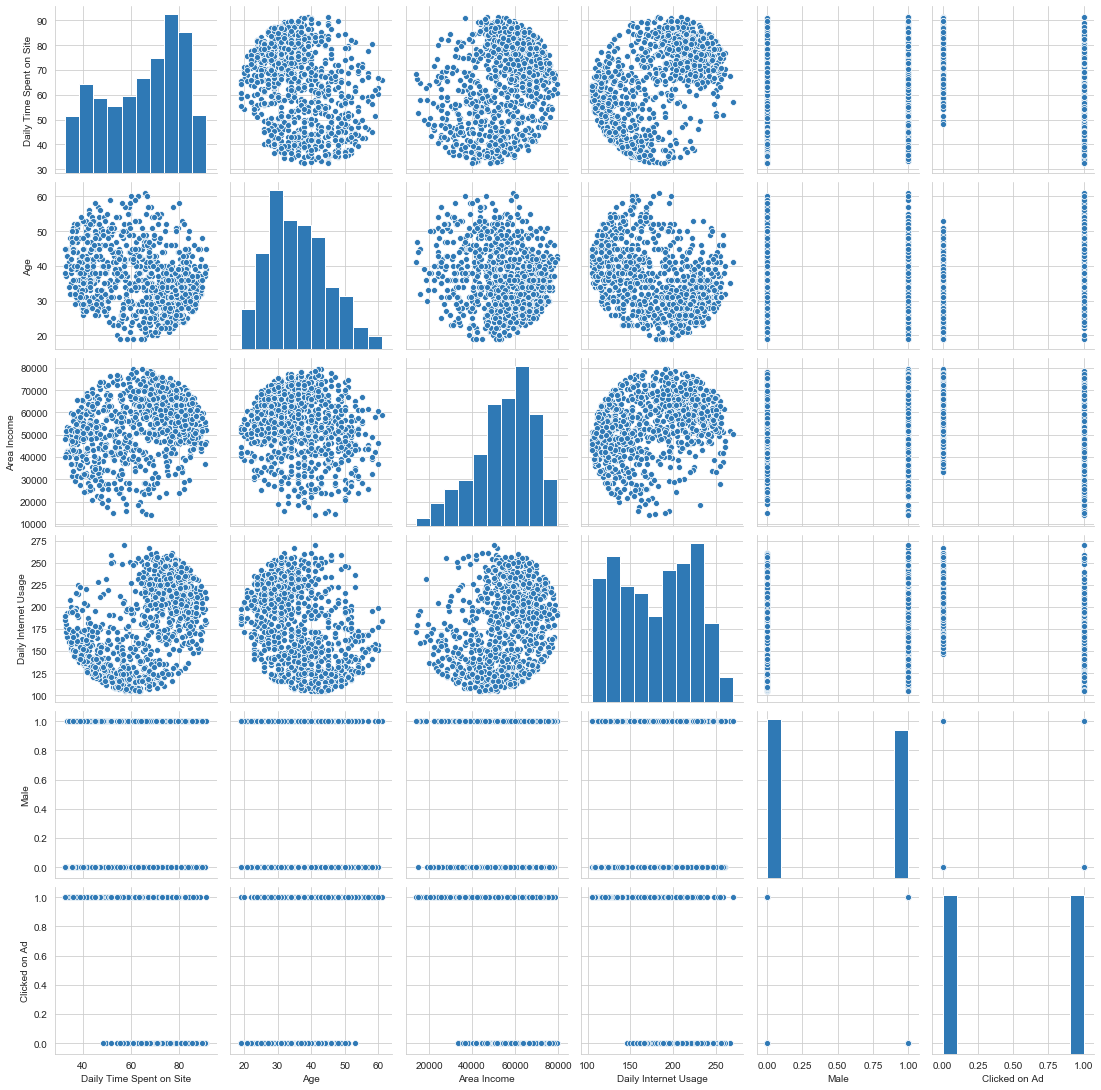

In [10]:
# Pair Plot
sns.pairplot(AdClick_df)

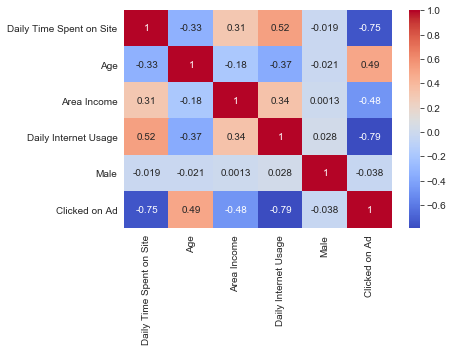

In [11]:
# Heat Map
sns.heatmap(AdClick_df.corr(), annot=True, cmap='coolwarm')

In [12]:
# Dropping of categorical columns
AdClick_df.drop(['Ad Topic Line', 'City', 'Country'], axis=1, inplace=True)

In [13]:
# Transforming of Timestamp to Month, Day of the month, Day of the week, Hour
AdClick_df['Timestamp'] = pd.to_datetime(AdClick_df['Timestamp'])

AdClick_df['Month'] = AdClick_df['Timestamp'].dt.month
AdClick_df['Day of the month'] = AdClick_df['Timestamp'].dt.day
AdClick_df['Day of the week'] = AdClick_df['Timestamp'].dt.dayofweek
AdClick_df['Hour'] = AdClick_df['Timestamp'].dt.hour
AdClick_df = AdClick_df.drop(['Timestamp'], axis=1)

AdClick_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,2,11,3,21
996,51.30,45,67782.17,134.42,1,1,4,22,4,2
997,51.63,51,42415.72,120.37,1,1,2,1,0,17
998,55.55,19,41920.79,187.95,0,0,3,24,3,2


In [14]:
# Columns of the data now
AdClick_df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Month',
       'Day of the month', 'Day of the week', 'Hour'],
      dtype='object')

In [15]:
# Split columns into X and y
X = AdClick_df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Month', 'Day of the month', 'Day of the week', 'Hour']]
y = AdClick_df['Clicked on Ad']

In [16]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# Create and train the model
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Prediction for Logistic regression
predicted_LR = model_1.predict(X_test)

In [19]:
# Checking for various accuracy for Logistic regression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Logistic regression accuracy: ',accuracy_score(y_test, predicted_LR))
print('')

classification = classification_report(y_test, predicted_LR)
print('Classification Report')
print(classification)
print('')

confusion = confusion_matrix(y_test, predicted_LR)
print('Confusion Matrix:')
print(confusion)

Logistic regression accuracy:  0.9151515151515152

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       162
           1       0.96      0.87      0.91       168

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330


Confusion Matrix:
[[156   6]
 [ 22 146]]


In [20]:
# Trying out decision tree
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# Prediction for DecisionTreeClassifier
predicted_dt = model_2.predict(X_test)

In [22]:
# Checking for various accuracy for DecisionTreeClassifier
print('DecisionTree accuracy: ',accuracy_score(y_test, predicted_dt))
print('')

classification = classification_report(y_test, predicted_dt)
print('Classification Report')
print(classification)
print('')

confusion = confusion_matrix(y_test, predicted_dt)
print('Confusion Matrix:')
print(confusion)

DecisionTree accuracy:  0.9424242424242424

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       162
           1       0.94      0.95      0.94       168

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330


Confusion Matrix:
[[152  10]
 [  9 159]]
